<a href="https://colab.research.google.com/github/gauwuhar/fuzzy-octo-robot/blob/main/DS_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка и предобработка данных


In [ ]:
file_path = '/content/ЗП поступления.csv'

In [ ]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
# Чтение файла GZIP
with gzip.open(file_path, 'rt', encoding='latin1') as f:
    df = pd.read_csv(f)

# Преобразование столбца с датой в формат datetime
df['DOCDATE'] = pd.to_datetime(df['DOCDATE'], format='%Y-%m-%d')

# Проверим первые строки данных
df.head()

,DOCDATE,CLIENT_ID
0,2024-01-31,0
1,2024-05-31,0
2,2024-03-19,0
3,2024-04-08,0
4,2023-08-31,0


In [ ]:
# Проверим наличие дубликатов
df.duplicated().sum()

np.int64(0)

In [ ]:
# Проверим информацию о типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6803000 entries, 0 to 6802999
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   DOCDATE    datetime64[ns]
 1   CLIENT_ID  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 103.8 MB


In [ ]:
df.describe()

,DOCDATE,CLIENT_ID
count,6803000,6.803000e+06
mean,2023-11-17 22:35:49.530736384,2.218306e+05
min,2023-05-02 00:00:00,0.000000e+00
25%,2023-08-10 00:00:00,9.677500e+04
50%,2023-11-27 00:00:00,2.057360e+05
75%,2024-02-27 00:00:00,3.337990e+05
max,2024-05-31 00:00:00,5.795330e+05
std,NaN,1.454840e+05


# Анализ активности клиентов




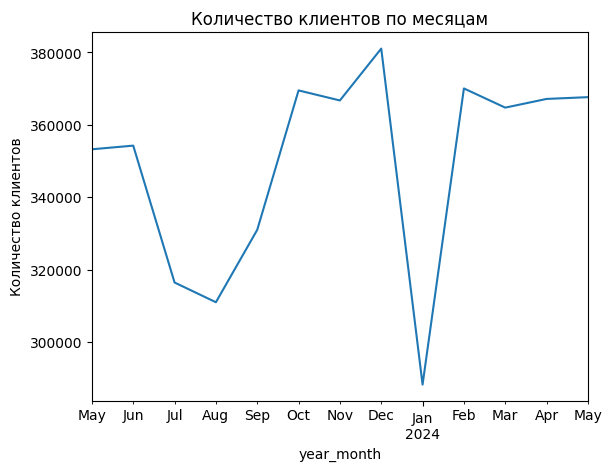

np.int64(0)

In [ ]:
# Создадим новый столбец для месяца и года
df['year_month'] = df['DOCDATE'].dt.to_period('M')

# Считаем количество клиентов по месяцам
clients_per_month = df.groupby('year_month')['CLIENT_ID'].nunique()

# Количество клиентов, которые получают зарплату ежемесячно
monthly_clients = clients_per_month[clients_per_month == 1].count()


# Построим график количества клиентов по месяцам
clients_per_month.plot(kind='line', title="Количество клиентов по месяцам")
plt.ylabel("Количество клиентов")
plt.show()

# Выведем статистику по клиентам, получающим зарплату ежемесячно
monthly_clients


# Анализ нерегулярных выплат


In [ ]:
# Считаем количество зачислений по каждому клиенту
client_activity = df.groupby('CLIENT_ID')['DOCDATE'].count()

# Определим, какие клиенты получают зарплату нерегулярно
irregular_clients = client_activity[client_activity < 12]  # Меньше 12 выплат в год

# Рассчитаем процент клиентов, которые получают зарплату нерегулярно
irregular_percentage = (len(irregular_clients) / len(client_activity)) * 100

# Выведем процент нерегулярных клиентов
irregular_percentage


51.89393547229325

# Паттерны выплат (дни недели)


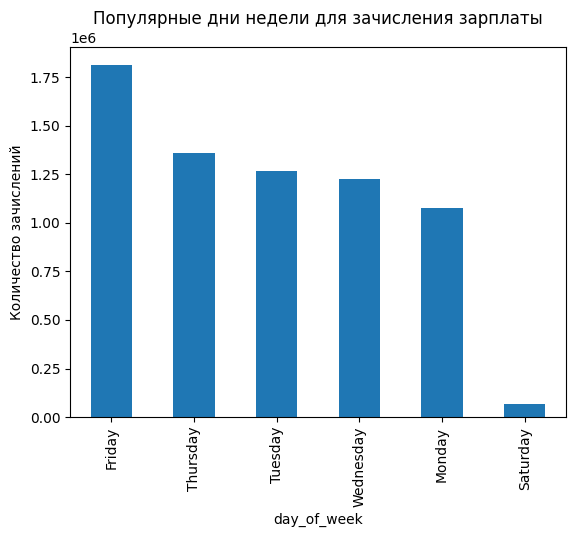

,count
day_of_week,
Friday,1811408
Thursday,1357608
Tuesday,1265423
Wednesday,1225395
Monday,1074529
Saturday,68637


In [ ]:
# Извлечем день недели
df['day_of_week'] = df['DOCDATE'].dt.day_name()

# Подсчитаем количество зачислений по дням недели
day_of_week_counts = df['day_of_week'].value_counts()

# Построим график
day_of_week_counts.plot(kind='bar', title='Популярные дни недели для зачисления зарплаты')
plt.ylabel("Количество зачислений")
plt.show()

# Выведем количество зачислений по дням недели
day_of_week_counts


# Частота получения зарплаты среди клиентов


In [ ]:
# Частота получения зарплаты каждым клиентом (по количеству зачислений)
client_frequency = df.groupby('CLIENT_ID')['DOCDATE'].count()

# Средняя частота получения зарплаты
average_frequency = client_frequency.mean()

# Медианная частота получения зарплаты
median_frequency = client_frequency.median()

# Выведем результаты
average_frequency, median_frequency


(np.float64(11.738741816701005), 11.0)

# Группировка клиентов по частоте зачислений


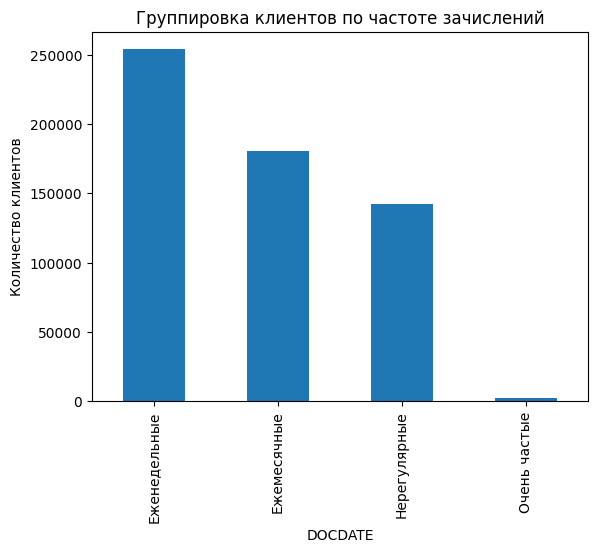

,count
DOCDATE,
Еженедельные,253903
Ежемесячные,180780
Нерегулярные,142429
Очень частые,2325


In [ ]:
# Группировка клиентов по частоте зачислений
bins = [0, 4, 12, 52, 100]  # Примерные интервалы: нерегулярные, ежемесячные, еженедельные и более частые
labels = ['Нерегулярные', 'Ежемесячные', 'Еженедельные', 'Очень частые']
client_groups = pd.cut(client_frequency, bins=bins, labels=labels)

# Подсчитаем количество клиентов в каждой группе
client_groups_counts = client_groups.value_counts()

import matplotlib.pyplot as plt

# Построим график
client_groups_counts.plot(kind='bar', title='Группировка клиентов по частоте зачислений')
plt.ylabel("Количество клиентов")
plt.show()

# Выведем количество клиентов в каждой группе
client_groups_counts


# Аномалии в выплатах


In [ ]:
# Аномально частые или редкие выплаты
outliers = client_frequency[(client_frequency > 50) | (client_frequency < 2)]

# Посмотрим на этих клиентов
outliers


,DOCDATE
CLIENT_ID,
8,75
27,64
64,1
158,151
265,1
...,...
579529,1
579530,1
579531,1


# Динамика зачислений по месяцам


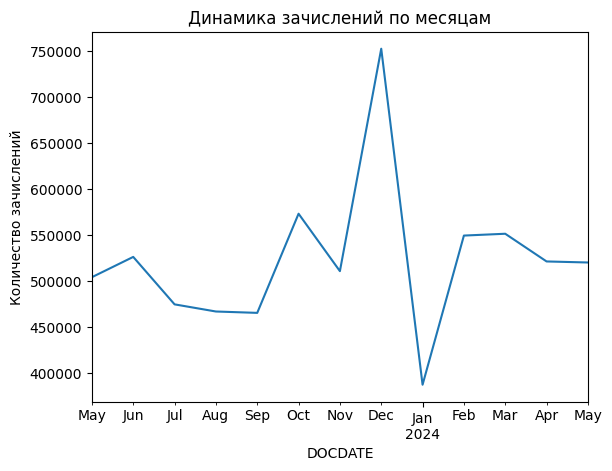

,0
DOCDATE,
2023-05,504160
2023-06,526202
2023-07,474633
2023-08,466869
2023-09,465378
2023-10,573135
2023-11,510734
2023-12,752443
2024-01,387299


In [ ]:
# Подсчитаем количество зачислений по месяцам
monthly_counts = df.groupby(df['DOCDATE'].dt.to_period('M')).size()

# Построим график
monthly_counts.plot(kind='line', title='Динамика зачислений по месяцам')
plt.ylabel("Количество зачислений")
plt.show()

# Выведем результаты по месяцам
monthly_counts


# Топ клиентов с максимальными пропусками


In [ ]:
# Топ клиентов по частоте зачислений
top_clients = client_frequency.sort_values(ascending=False).head(10)

# Выведем результаты
top_clients


,DOCDATE
CLIENT_ID,
8152,218
4893,216
4603,209
3603,203
28148,203
37742,193
6031,188
18766,186
17903,184


# Создание метки оттока для прогнозирования


In [ ]:
# === 2. Подготовка данных ===
df['DOCDATE'] = pd.to_datetime(df['DOCDATE'])
df['year_month'] = df['DOCDATE'].dt.to_period('M')
df = df.drop_duplicates(subset=['CLIENT_ID', 'DOCDATE'])

# === 3. Формирование клиент-месяц таблицы ===
client_month = df.groupby(['CLIENT_ID', 'year_month']).size().reset_index(name='payments')
client_month['has_payment'] = 1  # бинарный флаг

# === 4. Pivot таблица: клиент × месяц ===
pivot = client_month.pivot(index='CLIENT_ID', columns='year_month', values='has_payment').fillna(0).astype(int)
pivot = pivot.sort_index(axis=1)  # сортируем месяцы по хронологии

# === 5. Анализ оттока ===
results = []
months = list(pivot.columns)

for i in range(3, len(months)):
    m = months[i]
    m1, m2, m3 = months[i-1], months[i-2], months[i-3]

    active_3_months = (pivot[m1] & pivot[m2] & pivot[m3])  # клиенты с 3 платежами подряд
    churned = (active_3_months == 1) & (pivot[m] == 0)      # те, кто не получил в M

    total_active = active_3_months.sum()
    total_churned = churned.sum()
    churn_rate = (total_churned / total_active) * 100 if total_active > 0 else 0

    results.append({
        'Месяц анализа': str(m),
        'Клиентов, активных 3 месяца до': int(total_active),
        'Из них ушли в этом месяце': int(total_churned),
        '% оттока': round(churn_rate, 2)
    })

# === 6. Вывод таблицы ===
churn_df = pd.DataFrame(results)
print(churn_df)

  Месяц анализа  Клиентов, активных 3 месяца до  Из них ушли в этом месяце  \
0       2023-08                          273959                      31957   
1       2023-09                          256942                      23487   
2       2023-10                          246932                      15844   
3       2023-11                          253886                      16689   
4       2023-12                          282731                      11427   
5       2024-01                          324241                      79582   
6       2024-02                          259088                      18160   
7       2024-03                          254636                      15674   
8       2024-04                          247792                      10869   
9       2024-05                          320380                      17798   

   % оттока  
0     11.66  
1      9.14  
2      6.42  
3      6.57  
4      4.04  
5     24.54  
6      7.01  
7      6.16  
8      4.39  
9

# Модели прогнозирования

In [ ]:
import pandas as pd
import gzip
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === Загрузка данных ===
with gzip.open("ЗП поступления.csv", 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f)

df['DOCDATE'] = pd.to_datetime(df['DOCDATE'])
df = df.drop_duplicates(subset=['CLIENT_ID', 'DOCDATE'])

# === Формируем фичи по клиенту ===
# Считаем кол-во месяцев с выплатами
df['year_month'] = df['DOCDATE'].dt.to_period('M')
monthly_activity = df.groupby(['CLIENT_ID', 'year_month']).size().reset_index(name='has_payment')
monthly_activity['has_payment'] = 1

# Pivot — клиент x месяц
pivot = monthly_activity.pivot(index='CLIENT_ID', columns='year_month', values='has_payment').fillna(0).astype(int)
pivot = pivot.sort_index(axis=1)

# Вычислим churn как раньше
months = list(pivot.columns)
churn_labels = []
for client_id, row in pivot.iterrows():
    label = 0
    for i in range(3, len(months)):
        m1, m2, m3 = months[i-1], months[i-2], months[i-3]
        m = months[i]
        if row[m1] == 1 and row[m2] == 1 and row[m3] == 1 and row[m] == 0:
            label = 1
            break
    churn_labels.append(label)

pivot['churn'] = churn_labels

# === Генерация признаков (фичей) ===
pivot['months_with_salary'] = pivot[months].sum(axis=1)
pivot['avg_monthly_freq'] = pivot[months].rolling(window=3, axis=1).sum().mean(axis=1)
pivot['last_active_month'] = pivot[months].iloc[:, -3:].sum(axis=1)

# Финальный датасет
X = pivot[['months_with_salary', 'avg_monthly_freq', 'last_active_month']]
y = pivot['churn']

# === Обучение модели ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Метрики качества ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-34-ba899f8182b7>:42: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  pivot['avg_monthly_freq'] = pivot[months].rolling(window=3, axis=1).sum().mean(axis=1)


Accuracy: 0.9320403426885348
Confusion Matrix:
[[66599  4850]
 [ 3027 41431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     71449
           1       0.90      0.93      0.91     44458

    accuracy                           0.93    115907
   macro avg       0.93      0.93      0.93    115907
weighted avg       0.93      0.93      0.93    115907



In [ ]:
!pip install imbalanced-learn xgboost

In [ ]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
from itertools import groupby

# ML-модели и метрики
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, precision_recall_curve, auc, roc_auc_score, RocCurveDisplay
)
from sklearn.model_selection import train_test_split


In [ ]:
import pandas as pd
from itertools import groupby
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Убедимся, что даты в порядке
df = df.sort_values(['CLIENT_ID', 'DOCDATE'])
df['year_month'] = df['DOCDATE'].dt.to_period('M')

# 2. Построим pivot-таблицу: строки — клиенты, столбцы — месяцы
pivot = df.groupby(['CLIENT_ID', 'year_month']).size().unstack(fill_value=0)
pivot = pivot.sort_index(axis=1)

# 3. Посмотрим доступные месяцы
available_months = pivot.columns.sort_values()
print("📅 Месяцы в данных:", list(available_months[-6:]))

# 4. Выберем последние доступные 4 месяца: 3 для анализа, 1 — как target
try:
    churn_month = available_months[-1]
    m1 = available_months[-2]
    m2 = available_months[-3]
    m3 = available_months[-4]
except IndexError:
    raise ValueError("Недостаточно месяцев в данных для анализа churn")

# 5. Обеспечим наличие колонок
for period in [m3, m2, m1, churn_month]:
    if period not in pivot.columns:
        pivot[period] = 0

# 6. Определим churn
active_3 = (pivot[m1] > 0) & (pivot[m2] > 0) & (pivot[m3] > 0)
churn = ((pivot[churn_month] == 0) & active_3).astype(int)

# 7. Построим признаки (фичи)
months_before = [col for col in pivot.columns if col < churn_month]

X = pd.DataFrame({
    'months_with_salary': pivot.loc[active_3, months_before].gt(0).sum(axis=1),
    'avg_last_3': pivot.loc[active_3, [m3, m2, m1]].mean(axis=1),
    'streak': pivot.loc[active_3, months_before].gt(0).astype(int)
                .apply(lambda x: max([sum(1 for _ in g) for k, g in groupby(x) if k]), axis=1)
})

y = churn.loc[active_3]

from imblearn.over_sampling import RandomOverSampler
# 8. Train/test split и обучение модели
if len(X) == 0 or y.sum() == 0:
    print("⚠️ Нет подходящих клиентов для обучения (проверьте даты или активность)")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ros = RandomOverSampler(random_state=42)
    X_train, y_train = ros.fit_resample(X_train, y_train)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))


📅 Месяцы в данных: [Period('2023-12', 'M'), Period('2024-01', 'M'), Period('2024-02', 'M'), Period('2024-03', 'M'), Period('2024-04', 'M'), Period('2024-05', 'M')]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     90754
           1       0.10      0.49      0.17      5360

    accuracy                           0.72     96114
   macro avg       0.53      0.61      0.50     96114
weighted avg       0.91      0.72      0.80     96114



In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Модели
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Сбор результатов
results = {}
fitted_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1-score': round(f1_score(y_test, y_pred), 4)
    }
    fitted_models[name] = model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:47:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 211828, number of negative: 211828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 423656, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
print(results_df)


                      Accuracy  Precision  Recall  F1-score
Model                                                      
Random Forest           0.7248     0.0995  0.4890    0.1654
Logistic Regression     0.5697     0.0738  0.5817    0.1310
Gradient Boosting       0.7206     0.0977  0.4868    0.1627
HistGradientBoosting    0.7104     0.0972  0.5060    0.1631
XGBoost                 0.7185     0.0986  0.4974    0.1646
LightGBM                0.7194     0.0989  0.4970    0.1650


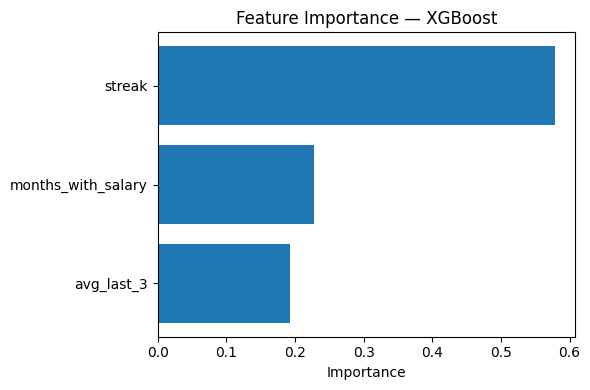

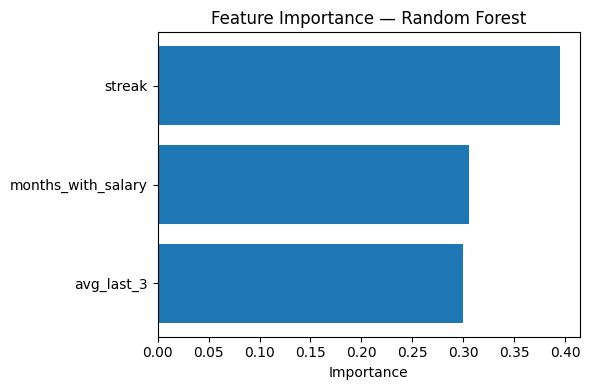

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    features = X.columns
    sorted_idx = importances.argsort()[::-1]

    plt.figure(figsize=(6, 4))
    plt.barh(features[sorted_idx], importances[sorted_idx])
    plt.title(f"Feature Importance — {model_name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Пример:
plot_feature_importance(fitted_models["XGBoost"], "XGBoost")
plot_feature_importance(fitted_models["Random Forest"], "Random Forest")


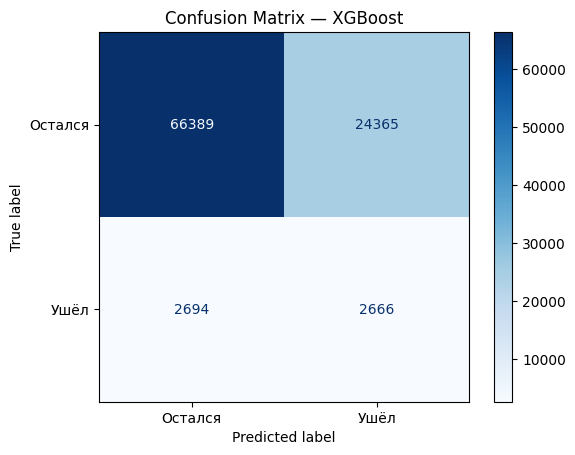

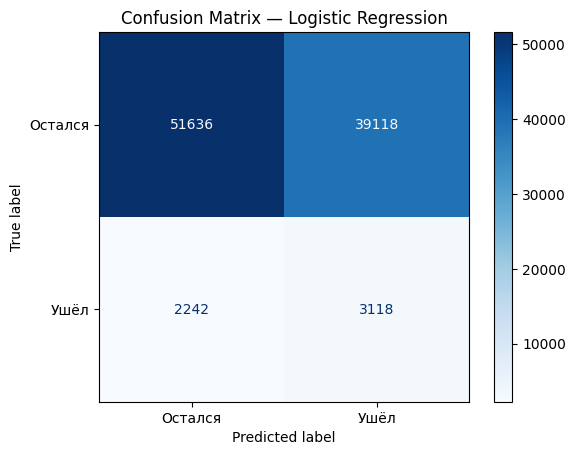

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(model, model_name):
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Остался", "Ушёл"],
        cmap="Blues"
    )
    plt.title(f"Confusion Matrix — {model_name}")
    plt.grid(False)
    plt.show()

# Пример:
plot_confusion_matrix(fitted_models["XGBoost"], "XGBoost")
plot_confusion_matrix(fitted_models["Logistic Regression"], "Logistic Regression")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


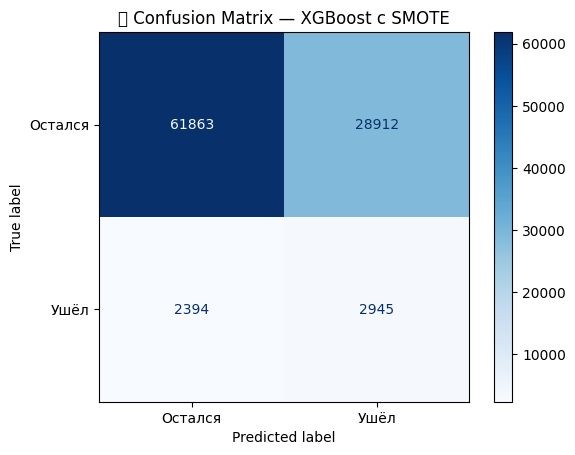

In [ ]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Балансировка классов
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Остался', 'Ушёл'], cmap="Blues"
)
plt.title("📊 Confusion Matrix — XGBoost с SMOTE")
plt.grid(False)
plt.show()


<ipython-input-69-894213d14fcd>:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


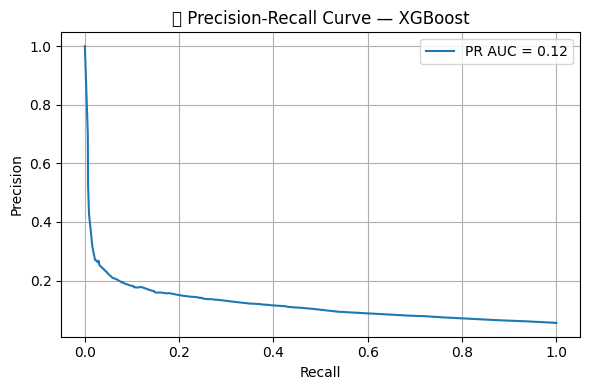

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision-Recall Curve — XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


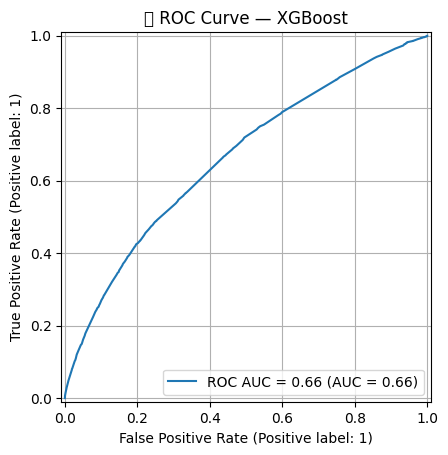

In [ ]:
roc_auc = roc_auc_score(y_test, y_proba)
RocCurveDisplay.from_predictions(y_test, y_proba, name=f"ROC AUC = {roc_auc:.2f}")
plt.title("🔥 ROC Curve — XGBoost")
plt.grid(True)
plt.show()


[LightGBM] [Info] Number of positive: 211807, number of negative: 211807
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 423614, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


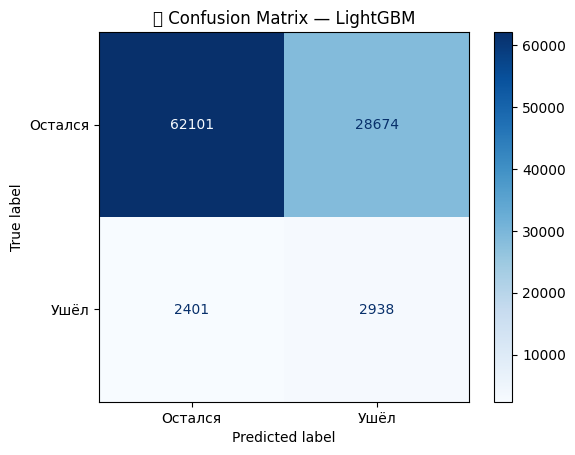

<ipython-input-73-a03354260fda>:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


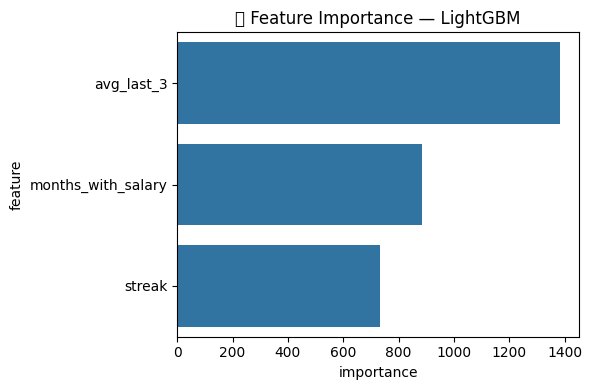

In [ ]:
# 📊 Импорт библиотек
import pandas as pd
import gzip
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE


# 🚀 Обучение LightGBM и визуализация результатов
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Остался', 'Ушёл'], cmap="Blues"
)
plt.title("📊 Confusion Matrix — LightGBM")
plt.grid(False)
plt.show()

# Feature importance
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=feature_imp, x='importance', y='feature')
plt.title("📈 Feature Importance — LightGBM")
plt.tight_layout()
plt.show()
